In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Loading Dataset

The dataset was obtained from: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?select=marketing_campaign.csv

In [5]:
dataset = pd.read_csv('marketing_campaign.csv',sep='\t')

In [6]:
dataset.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# Atributes

People

ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise
Products

MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
Promotion

NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Place

NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month

# Explore the Data

In [7]:
dataset.shape

(2240, 29)

In [8]:
dataset.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [9]:
dataset = dataset.dropna()
dataset = dataset.drop(['Z_CostContact','Z_Revenue','Dt_Customer','ID'],axis=1)
dataset.shape

(2216, 25)

We need to transform Education and Marital_Status. Dt_Customer and ID will be removed suposing they have no big influence. Z_CostContact and Z_Revenue have only a single value each, so they will be removed as well

In [10]:
dataset.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [11]:
education_substitution = {'Basic':0,'2n Cycle':1,'Graduation':2,'Master':3,'PhD':4}
dataset['Education'] = dataset['Education'].apply(lambda x: education_substitution[x])
dataset

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,2,Single,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,2,Single,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,2,Together,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,2,Together,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,4,Married,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,Married,61223.0,0,1,46,709,43,182,...,3,4,5,0,0,0,0,0,0,0
2236,1946,4,Together,64014.0,2,1,56,406,0,30,...,2,5,7,0,0,0,1,0,0,0
2237,1981,2,Divorced,56981.0,0,0,91,908,48,217,...,3,13,6,0,1,0,0,0,0,0
2238,1956,3,Together,69245.0,0,1,8,428,30,214,...,5,10,3,0,0,0,0,0,0,0


In [12]:
Counter(dataset.Marital_Status)

Counter({'Single': 471,
         'Together': 573,
         'Married': 857,
         'Divorced': 232,
         'Widow': 76,
         'Alone': 3,
         'Absurd': 2,
         'YOLO': 2})

Once we are going to separate the variable Marital_Status into different columns, let's start by removing the lines with 'YOLO','Absurd' and change 'Alone' into 'Single'

In [13]:
dataset = dataset[dataset['Marital_Status'] != 'Absurd']
dataset = dataset[dataset['Marital_Status'] != 'YOLO']
dataset['Marital_Status'] = dataset['Marital_Status'].apply(lambda x: x.replace('Alone','Single'))
dataset.reset_index(drop=True,inplace=True)

In [14]:
Counter(dataset.Marital_Status)

Counter({'Single': 474,
         'Together': 573,
         'Married': 857,
         'Divorced': 232,
         'Widow': 76})

In [15]:
onehot = OneHotEncoder(handle_unknown='ignore',sparse=False)
marital_one_hot = onehot.fit_transform(dataset[['Marital_Status']])
marital_one_hot

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

In [16]:
list(onehot.categories_[0])

['Divorced', 'Married', 'Single', 'Together', 'Widow']

In [17]:
one_hot_dataframe = pd.DataFrame(marital_one_hot,columns=list(onehot.categories_[0]))
one_hot_dataframe

,Divorced,Married,Single,Together,Widow
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
2207,0.0,1.0,0.0,0.0,0.0
2208,0.0,0.0,0.0,1.0,0.0
2209,1.0,0.0,0.0,0.0,0.0
2210,0.0,0.0,0.0,1.0,0.0


In [18]:
dataset = dataset.join(one_hot_dataframe)
dataset

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Divorced,Married,Single,Together,Widow
0,1957,2,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0
1,1954,2,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
2,1965,2,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0
3,1984,2,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0
4,1981,4,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,1967,2,Married,61223.0,0,1,46,709,43,182,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
2208,1946,4,Together,64014.0,2,1,56,406,0,30,...,0,1,0,0,0,0.0,0.0,0.0,1.0,0.0
2209,1981,2,Divorced,56981.0,0,0,91,908,48,217,...,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
2210,1956,3,Together,69245.0,0,1,8,428,30,214,...,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0


In [19]:
dataset = dataset.drop('Marital_Status',axis=1)
dataset

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Divorced,Married,Single,Together,Widow
0,1957,2,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0
1,1954,2,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
2,1965,2,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0
3,1984,2,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0
4,1981,4,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,1967,2,61223.0,0,1,46,709,43,182,42,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
2208,1946,4,64014.0,2,1,56,406,0,30,0,...,0,1,0,0,0,0.0,0.0,0.0,1.0,0.0
2209,1981,2,56981.0,0,0,91,908,48,217,32,...,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
2210,1956,3,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0


<AxesSubplot:>

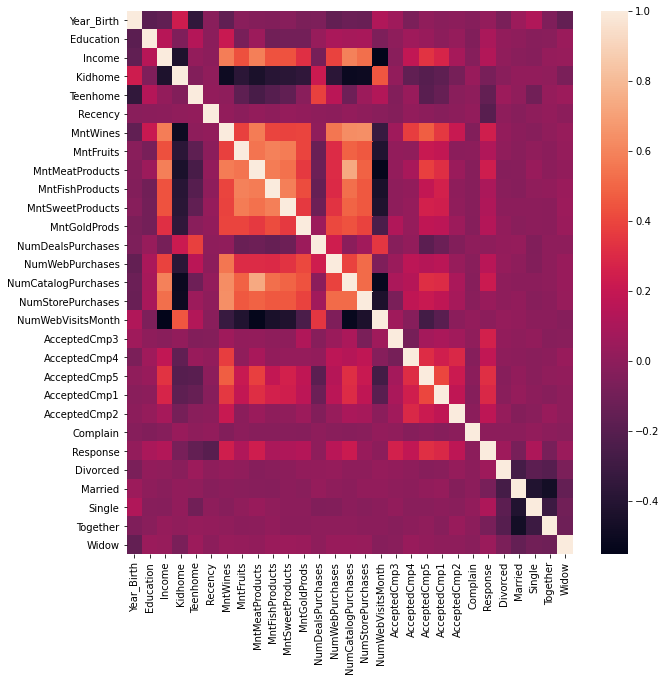

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr())

It doesn't seem to be any relevant correlation between variables

# Testing Clustering Models

### KMeans

In [21]:
from sklearn.cluster import KMeans
def train_kmeans(data,n):
    kmeans = KMeans(n_clusters=n)
    y_pred = kmeans.fit_predict(data)
    inertia = kmeans.inertia_
    silhouette = silhouette_score(data,kmeans.labels_)
    return y_pred,inertia,silhouette

In [22]:
train_kmeans(dataset,5)

(array([0, 3, 0, ..., 0, 0, 0]), 122224365771.10744, 0.5301759513891134)

In [23]:
list_of_inertias = []
list_of_silhouette = []
clusters = range(2,10)
for x in clusters:
    predictions,inertia,silhouette = train_kmeans(dataset,x)
    list_of_inertias.append(inertia)
    list_of_silhouette.append(silhouette)

results_for_graphs = pd.DataFrame({'clusters':clusters,'inertia':list_of_inertias,'silhouette':list_of_silhouette})

<AxesSubplot:xlabel='clusters', ylabel='inertia'>

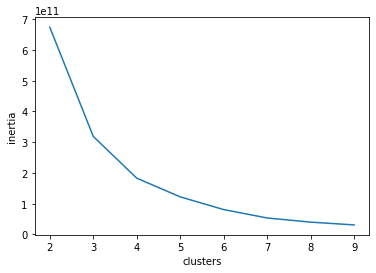

In [24]:
sns.lineplot(x="clusters", y="inertia",
             data=results_for_graphs)

<AxesSubplot:xlabel='clusters', ylabel='silhouette'>

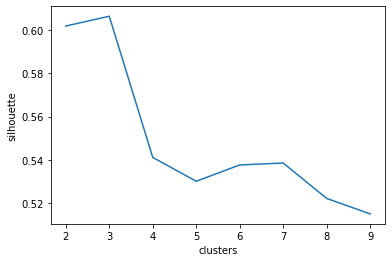

In [25]:
sns.lineplot(x="clusters", y="silhouette",
             data=results_for_graphs)

Analysing the Silhouette graph, we should probably use 3 clusters to separete the customers

In [26]:
y_pred,_,_ = train_kmeans(dataset,3)
Counter(y_pred)

Counter({1: 1076, 0: 1135, 2: 1})

As we can see, we are basically dividing into 2 groups

### DBSCAN

In [27]:
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)

In [28]:
from sklearn.cluster import DBSCAN
def train_dbscan(eps,min_samples,data):
    dbscan = DBSCAN(eps=eps,min_samples=min_samples)
    y_pred = dbscan.fit_predict(data)
    # silhouette = silhouette_score(data,dbscan.labels_)
    return y_pred


In [29]:
range_min_samples = range(2,50,5)
range_eps = [2,4,6,8,10,11,12,13,15,17]

register = []

for min_samples in range_min_samples:
    for eps in range_eps:
        y_pred = train_dbscan(eps,min_samples,dataset_scaled)
        if len(set(y_pred)) > 1:
            silhouette = silhouette_score(dataset_scaled,y_pred)
            register.append((min_samples,eps,silhouette,len(set(y_pred))))

In [30]:
register_graph = pd.DataFrame(register,columns=['min_samples','eps','silhouette','num_clusters'])

<AxesSubplot:xlabel='min_samples', ylabel='silhouette'>

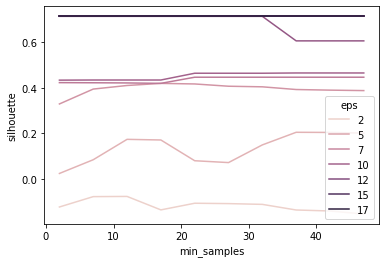

In [31]:
sns.lineplot(x="min_samples", y="silhouette",hue='eps',
             data=register_graph)

Looking at the graph, we could adopt an eps = 15 and understand how many clusters the model is selecting. It's logical to think that, when you decrease the min_samples, more clusters you are able to develope

In [32]:
register_graph[register_graph['eps'] == 15]

,min_samples,eps,silhouette,num_clusters
8,2,15,0.71338,2
18,7,15,0.71338,2
28,12,15,0.71338,2
38,17,15,0.71338,2
48,22,15,0.71338,2
58,27,15,0.71338,2
68,32,15,0.71338,2
78,37,15,0.71338,2
88,42,15,0.71338,2
98,47,15,0.71338,2


In [33]:
y_pred = train_dbscan(eps=15,min_samples=12,data=dataset_scaled)
Counter(y_pred)

Counter({0: 2211, -1: 1})

As we can see, the best model is simply clustering all the data in a single cluster and considering one outlier. Though it has a good silhouette, it has no application in out project

### MeanShift

In [34]:
from sklearn.cluster import MeanShift
def train_meanshift(data,bandwidth):
    meanshift = MeanShift(bandwidth=bandwidth)
    meanshift.fit(data)
    silhouette = silhouette_score(data,meanshift.labels_)
    print(silhouette)
    return silhouette,len(set(meanshift.labels_))

In [35]:
register = []

for bandwidth in range(3,15):
    silhouette,n_clusters = train_meanshift(dataset_scaled,bandwidth)
    
    register.append((bandwidth,silhouette,n_clusters))

0.1183604763103629
0.05774125066199485
0.10026538826611646
0.2309471164737679
0.3301066919061819
0.4121201839408487
0.4194919435961025
0.43371164495659786
0.7133804902559143
0.7133804902559143
0.7133804902559143
0.7133804902559143


In [36]:
pd.DataFrame(register,columns=['bandwidth','silhouette','n_clusters'])

,bandwidth,silhouette,n_clusters
0,3,0.118360,628
1,4,0.057741,264
2,5,0.100265,83
3,6,0.230947,23
4,7,0.330107,13
5,8,0.412120,8
6,9,0.419492,6
7,10,0.433712,3
8,11,0.713380,2
9,12,0.713380,2


In [37]:
meanshift = MeanShift(bandwidth=11)
meanshift.fit(dataset_scaled)
Counter(meanshift.labels_)

Counter({0: 2211, 1: 1})

After bandwidth = 11 the silhouette do not change anymore. We could say the circle is already big enougth and taking almost all the data.
But, as we can see, the result is not useful, once it has two clusters but the second one has only one data point

### Gaussian Mixture

In [48]:
from sklearn.mixture import GaussianMixture
def train_gaussianmixture(data,n_components,covariance_type,n_init):
    gaussianmixture = GaussianMixture(n_components=n_components,covariance_type=covariance_type,n_init=n_init)
    gaussianmixture.fit(data)
    bic = gaussianmixture.bic(data)
    aic = gaussianmixture.aic(data)
    print(bic,aic)
    print(gaussianmixture.converged_)
    print(gaussianmixture.n_iter_)

    return bic,aic

In [64]:
list_bic = []
list_aic = []
# list_components = [3,4,5,6,7,8,9,10,11,12,13,14,15]
list_components = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
for n_components in list_components:
    bic,aic = train_gaussianmixture(data=dataset_scaled,n_components=n_components,covariance_type='full',n_init=5)
    list_bic.append(bic)
    list_aic.append(aic)


18578.506225363984 10630.402831840724
True
16
-29107.13743216382 -39706.50917431572
True
24
-56683.32636978058 -69933.96646056112
True
17
-51533.34079920541 -67435.24923861458
True
30
-73474.6200707527 -92027.7968587905
True
19
-74140.09943005195 -95344.5445667184
True
28
-85869.31462241914 -109725.02810771421
True
15
-93654.62504606084 -120161.60687998455
True
37
-99644.65868118848 -128802.90886374083
True
12
-116323.26856748131 -148132.7870986623
True
21
-104051.34270745626 -138512.12958726587
True
28
-111179.33523598593 -148291.39046442418
True
12
-117384.63388556082 -157147.9574626277
True
20
-109660.5313841369 -152075.12330983242
True
36
-118264.59574512149 -163330.45601944564
True
19
-119102.80408938762 -166819.9327123404
True
17
-110448.51026767379 -160816.9072392552
True
14
-119972.5231582939 -172992.18847850396
True
14
-120925.71804056113 -176596.65170939983
True
27
-124127.34636948264 -182449.54838694996
True
20
-115820.2979119928 -176793.76827808877
True
17
-121022.662771354

In [65]:
results_for_graphs = pd.DataFrame({'num_components':list_components,'bic':list_bic,'aic':list_aic})

<AxesSubplot:xlabel='num_components', ylabel='bic'>

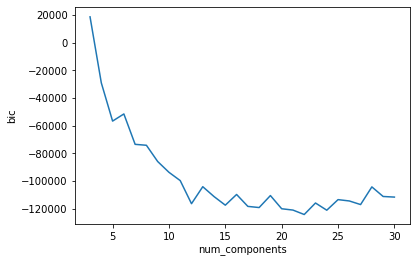

In [66]:
sns.lineplot(x="num_components", y="bic",
             data=results_for_graphs)

<AxesSubplot:xlabel='num_components', ylabel='aic'>

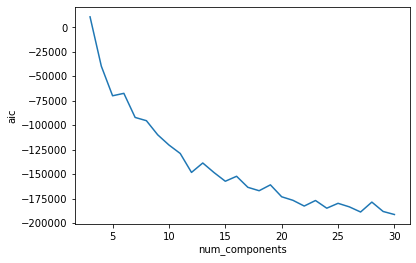

In [67]:
sns.lineplot(x="num_components", y="aic",
             data=results_for_graphs)